#### Loading the tree CSV data and show it

In [1]:
import pandas as pd
#load the data and show that we have correctly parsed the CSV
with open("Resources_Organized/Bestand3.csv") as file:
    data = pd.read_csv(file,sep=";")
data.head

<bound method NDFrame.head of       id                  x                 y               BHD
0      1  -68,2167006832299  61,3956239130436  56,1497142857143
1      2  -42,1984159281437  22,2948881437126  15,1288982035928
2      3  -35,6605485714286  48,7894283809524  34,5655619047619
3      4         -63,811228  60,6850993333333           32,0572
4      5  -12,3950435835351   77,242318062954  38,3888232445521
..   ...                ...               ...               ...
585  586  -36,9743130434783  38,8572591304348  28,9052173913044
586  587   -52,159067823765  38,5023822162884  40,0141842456609
587  588  -25,4799277966102  77,1735644067797  42,7526101694916
588  589  -8,60909308411215   75,078196728972  20,3729345794393
589  590  -26,3242885714286  59,0683546666667  46,8279238095239

[590 rows x 4 columns]>

##### Reading the TIF Data

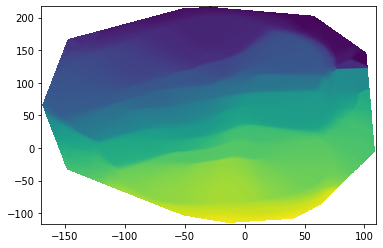

<AxesSubplot:>

In [8]:
import rasterio as rs
from rasterio.plot import show
import matplotlib

fp = r'Resources_Organized/Bestand3.tif'
bestand_tif = rs.open(fp)
show(bestand_tif, aspect='auto')

1


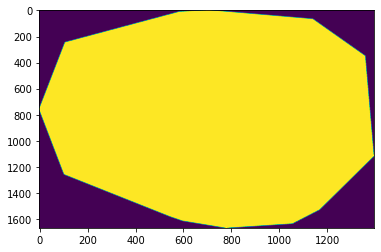

<AxesSubplot:>

In [16]:
# Read the band1 from the tif so we have array data
print(bestand_tif.count)
band1 = bestand_tif.read(1)
show(band1, aspect="auto")

In [27]:
import rioxarray
import geopandas as gpd
rds = rioxarray.open_rasterio("Resources_Organized/Bestand3.tif")
rds.name = "data"
bestand_3 = rds.squeeze().to_dataframe().reset_index()
#minify this for testing purposes
bestand_3 = bestand_3[1:10000]
geometry = gpd.points_from_xy(bestand_3.x, bestand_3.y)
gdf = gpd.GeoDataFrame(bestand_3, crs=rds.rio.crs, geometry=geometry)

In [37]:
#gdf.head
#gdf.plot(linewidth=400, lineheight=400)

from shapely.geometry import Polygon

In [57]:
# Convert tif to geometry

import rasterio
import rasterio.features
import rasterio.warp

geom_array=[]

with rasterio.open("Resources_Organized/Bestand3.tif") as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        # geom = rasterio.warp.transform_geom(
        #     dataset.crs, 'EPSG:4326', geom, precision=6)
        geom_array.append(Polygon(geom["coordinates"][0]))

In [59]:
forest = gpd.GeoDataFrame(geometry=geom_array)   

<AxesSubplot:>

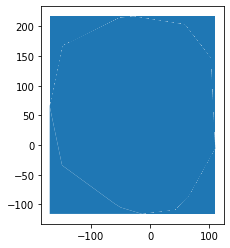

In [60]:
forest.plot()

#### And add the trees to the map

#### Function Planning

- What do we actually need for our computations?

1. Distances, angles between two points (ie. trees)
-> Easy, euclidean distance and some trigonometry
2. Check intersection with shapefiles
-> This can be skipped as req for now
3. Designate areas for roads, anchor trees and so on
-> manually draw those in - need a tool to allow to draw lines and polygons into our matrix
    1. This should probably happen on the raster map? So we have z coordinates
    2. Nope, we can use the geopandas area - they provide adequate geometry functions (isdisjoint, contains, areas, lines,...)
4. Computation of sample line:
    1. ID possible starting points and their cost
        1. Walk along street path
        2. Each 1m, test if:
            1. we find suitable anchor tree 
        1. Set line as vector
        2. Get distances of trees (scaling them with distance)
        3. 
- Ist es ein MIP, MILP Problem?
- Was ist die Kostenfunktion, was sind die Nebenbedingungen?
- Was sind die Variablentypen?